In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy

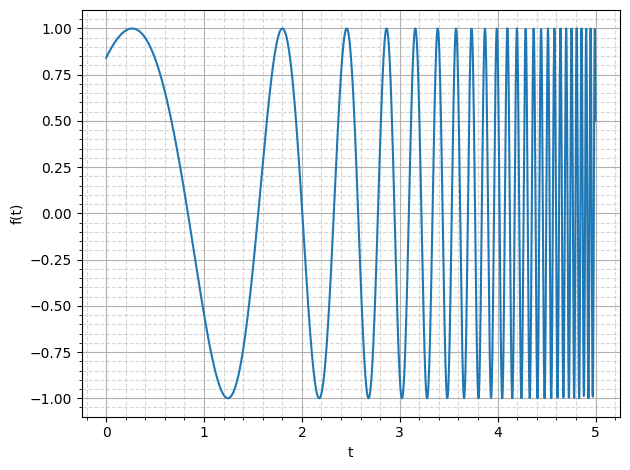

In [170]:
f = lambda t: np.sin(t + np.exp(t))

t = np.linspace(0,5,2000)

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(t, f(t))
ax.set_xlabel("t")
ax.set_ylabel("f(t)")

ax.minorticks_on()  # włącza dodatkowe podziałki
ax.grid(True, which='major', linestyle='-')   # grubsze linie dla głównych
ax.grid(True, which='minor', linestyle='--', alpha=0.5)   # cieńsze dla pomocniczych

plt.tight_layout() # ładniej wygląda wykres

(0.12099497713983345, 3.830526347503582e-11)


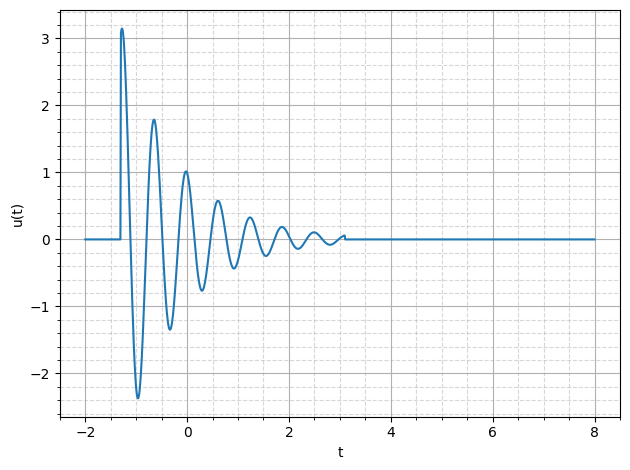

In [171]:
u = lambda t: np.where((t > -1.3) & (t < 3.1), 1.0, 0.0) * np.sin(10*t + 1.7) * np.exp(-0.9*t)

t = np.linspace(-2,8,1000)

integral_quad = scipy.integrate.quad(u, -1.3, 3.1)
print(integral_quad)

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(t, u(t))
ax.set_xlabel("t")
ax.set_ylabel("u(t)")

ax.minorticks_on()  # włącza dodatkowe podziałki
ax.grid(True, which='major', linestyle='-')   # grubsze linie dla głównych
ax.grid(True, which='minor', linestyle='--', alpha=0.5)   # cieńsze dla pomocniczych

plt.tight_layout() # ładniej wygląda wykres

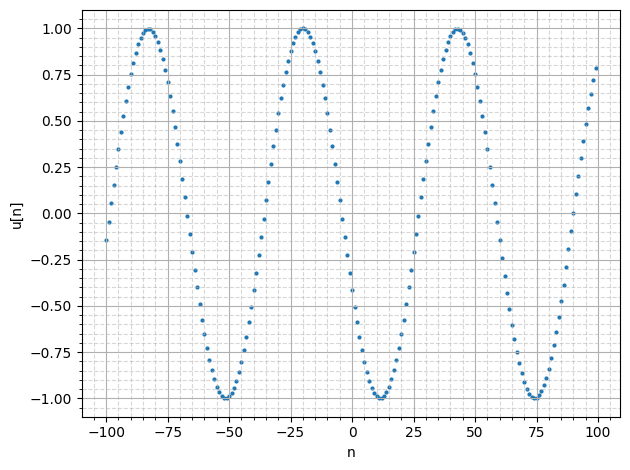

In [172]:
x = lambda n: np.cos(0.1*n + 2)

n = np.arange(-100,100,1)

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.scatter(n, x(n), s=4)
ax.set_xlabel("n")
ax.set_ylabel("u[n]")

ax.minorticks_on()  # włącza dodatkowe podziałki
ax.grid(True, which='major', linestyle='-')   # grubsze linie dla głównych
ax.grid(True, which='minor', linestyle='--', alpha=0.5)   # cieńsze dla pomocniczych

plt.tight_layout() # ładniej wygląda wykres

In [173]:
M = sp.Matrix([
    [1/19, 2/13, 3/7, 4/7, 9/11],
    [3/4, 1/17, 4/9, 1/7, 9/8],
    [sp.pi, sp.E, 6**3, 3/7, 2/8],
    [1, 3/5, 15/283, 3/29, 1/256],
    [2/56, 18/38, 29/84, 63/67, 48/85]
])

M = sp.cancel(M)
M = sp.simplify(M)

b = sp.Matrix([2/48, 849/24, 378/34, 28/4, 893/24])

b = sp.cancel(b)
b = sp.simplify(b)

sol = M.solve(b)

solN = sp.N(sol, 30)
solN

⎡529.530121631280324583697829721 ⎤
⎢                                ⎥
⎢-996.268397942941522349057028721⎥
⎢                                ⎥
⎢3.84337323186424453054555402464 ⎥
⎢                                ⎥
⎢739.039786800490855986721966098 ⎥
⎢                                ⎥
⎣-364.847863196400681424001709754⎦

In [8]:
M = np.array([
    [1.0/19, 2/13, 3/7, 4/7, 9/11],
    [3/4, 1/17, 4/9, 1/7, 9/8],
    [np.pi, np.e, 6**3, 3/7, 2/8],
    [1, 3/5, 15/283, np.power(3/29,3.7), 1/256],
    [2/56, 18/38, 29/84, 63/67, 48/85]
])

b = np.array([2/48, 849/24, 378/34, 28/4, 893/24])

sol = np.linalg.solve(M,b)

with np.printoptions(precision=10): 
    print(sol)

[ 359.8525421553 -586.8554051215    1.5580466934  463.4399029483
 -237.2370364899]


In [259]:
a = sp.symbols('a')
t, s = sp.symbols('t, s')
f = sp.sin(t)

F = sp.laplace_transform(f, t, s, noconds=True)
print("F(s) = ", F)

f_inv = sp.inverse_laplace_transform(F, s, t, noconds=True)
print("After inverse f(t) = ", f_inv)

F(s) =  1/(s**2 + 1)
After inverse f(t) =  sin(t)*Heaviside(t)


In [263]:
t, s = sp.symbols('t, s')

Yzir = (s+6)/(s**2 + 4*s + 3)
Yzsr = (2 + 1/s)/(s**2 + 4*s + 3)

yzir = sp.inverse_laplace_transform(Yzir, s, t)
yzsr = sp.inverse_laplace_transform(Yzsr, s, t)

yzir = sp.simplify(yzir)
yzsr = sp.simplify(yzsr)

yzir, yzsr

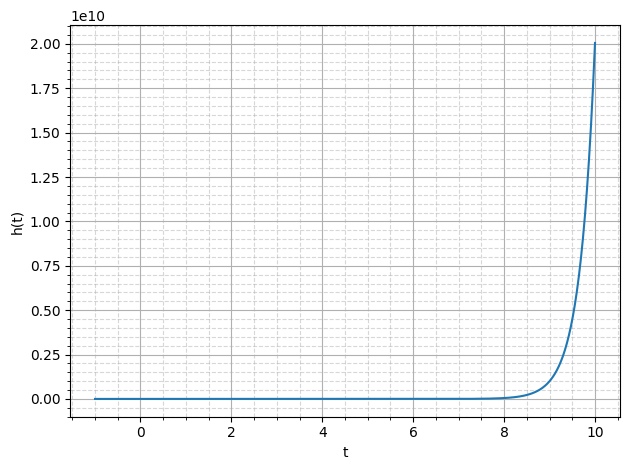

In [10]:
t, s = sp.symbols('t, s')

H = ( (s-(3+1j))**2 * (s-(3-1j))**2 )/( (s - 2j)*(s + 2j) * (s-(-2+4j))*(s-(-2-4j)) * (s-3) )

h = sp.inverse_laplace_transform(H, s, t)
h = sp.simplify(h)

h_ = sp.lambdify(t, h, 'numpy')
t_ = np.linspace(-1, 10, 1000)

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(t_, h_(t_))
ax.set_xlabel("t")
ax.set_ylabel("h(t)")

ax.minorticks_on()  # włącza dodatkowe podziałki
ax.grid(True, which='major', linestyle='-')   # grubsze linie dla głównych
ax.grid(True, which='minor', linestyle='--', alpha=0.5)   # cieńsze dla pomocniczych

plt.tight_layout() # ładniej wygląda wykres

In [39]:
# Wzmacniacz odwracający

Vin, Vo, I, Z, Zf, A = sp.symbols('V_{in}, V_{0}, I, Z, Z_{f}, A')

M = sp.Matrix([
    [-A, 1],
    [0, 1]
])
M = sp.cancel(M)
M = sp.simplify(M)

b = sp.Matrix([-A*I*Z, I*(Z+Zf)])
b = sp.cancel(b)
b = sp.simplify(b)

sol = M.solve(b)
sol = sp.cancel(sol)
sol = sp.simplify(sol)

H = sol[1]/sol[0]
H = sp.simplify(H)
H

A*(Z + Z_{f})/(A*Z + Z + Z_{f})

In [9]:
A, Zf = sp.symbols('A, Z_f')
Z1, Z2, Z3 = sp.symbols('Z_1, Z_2, Z_3')
V1, V2, V3 = sp.symbols('V_1, V_2, V_3')

M = sp.Matrix([
    [0,1,Z1,0,0],
    [0,1,0,Z2,0],
    [0,1,0,0,Z3],
    [1,-1,Zf,Zf,Zf],
    [1,A,0,0,0]
])
M = sp.cancel(M)
M = sp.simplify(M)

b = sp.Matrix([V1,V2,V3,0,0])
b = sp.cancel(b)
b = sp.simplify(b)

sol = M.solve(b)

Vo = sol[0]
Vo = sp.cancel(Vo)
Vo = sp.simplify(Vo)
Vo

A*Z_f*(-V_1*Z_2*Z_3 - V_2*Z_1*Z_3 - V_3*Z_1*Z_2)/(A*Z_1*Z_2*Z_3 + Z_1*Z_2*Z_3 + Z_1*Z_2*Z_f + Z_1*Z_3*Z_f + Z_2*Z_3*Z_f)

In [10]:
A, R, C= sp.symbols('A, R, C')
Vin, u0, s = sp.symbols('V_{in}, u_0, s')

M = sp.Matrix([
    [1/A, -R],
    [(-1-1/A), -1/(s*C)]
])
M = sp.cancel(M)
M = sp.simplify(M)

b = sp.Matrix([-Vin, u0/s])
b = sp.cancel(b)
b = sp.simplify(b)

sol = M.solve(b)

Vo = sol[0]
Vo = sp.cancel(Vo)
Vo = sp.simplify(Vo)
Vo

A*(-C*R*u_0 - V_{in})/(A*C*R*s + C*R*s + 1)

In [ ]:
# pierwiastki wielomianu x^2 + 3 x + 2
roots = np.roots([1, 3, 2])
with np.printoptions(precision=10): 
    print(roots)

[-2. -1.]


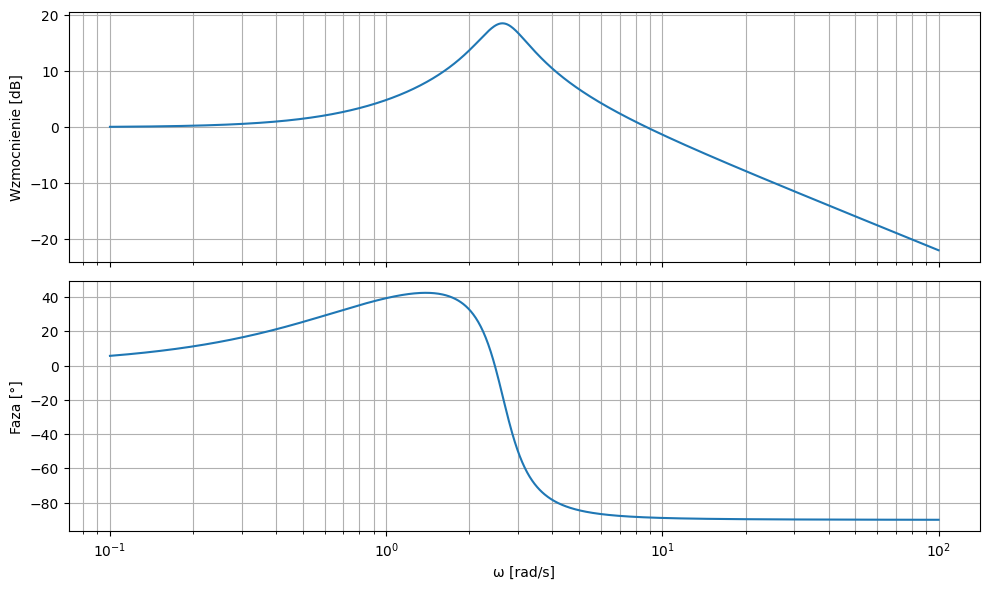

In [155]:
omega = np.logspace(-1, 2, 1000)  # od 0.1 do 100

num = 7 + 8j*omega
den = 7 - omega**2 + omega*1j

H = num/den

mag = 20 * np.log10(np.abs(H))      # w dB
phase = np.angle(H, deg=True)       # w stopniach

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1.semilogx(omega, mag)
ax1.set_ylabel("Wzmocnienie [dB]")
ax1.grid(True, which="both")

ax2.semilogx(omega, phase)
ax2.set_xlabel("ω [rad/s]")
ax2.set_ylabel("Faza [°]")
ax2.grid(True, which="both")

plt.tight_layout()
plt.show()

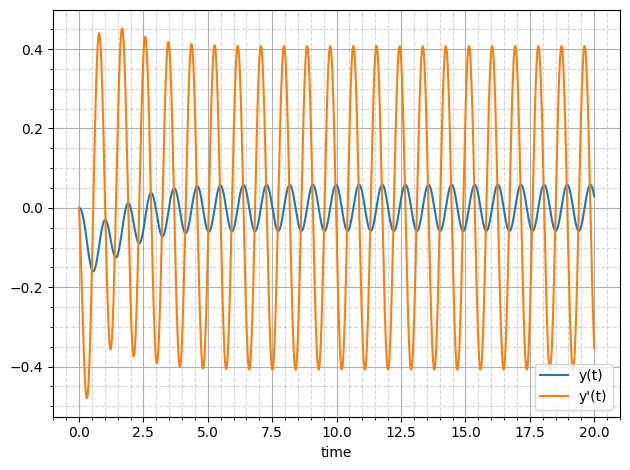

In [ ]:
# Solve initial value problem with scipy:
# y''(t) + 3 y'(t) + 2 y(t) = 3 cos(7 t + 2)
# y(0) = 0, y'(0) = 0

# Podstawienie y1 = y oraz y2 = y'

# y1'(t) = y2(t)
# y2'(t) = 3 cos(7 t + 2) - 3 y2(t) + 2 y1(t)
# y1(0) = 0, y2(0) = 0

# Definicja układu równań
def system(t, Y):
    y1, y2 = Y
    dy1dt = y2
    dy2dt = 3*np.cos(7*t + 2) - 3*y2 - 2*y1
    return [dy1dt, dy2dt]

Y0 = [0, 0]  # y(0), y'(0)

# Zakres czasu
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Rozwiązanie
sol = scipy.integrate.solve_ivp(system, t_span, Y0, t_eval=t_eval)

fig, ax = plt.subplots(nrows=1, ncols=1)

plt.plot(sol.t, sol.y[0], label="y(t)")
plt.plot(sol.t, sol.y[1], label="y'(t)")

ax.set_xlabel("time")

ax.minorticks_on()  
ax.grid(True, which='major', linestyle='-')   
ax.grid(True, which='minor', linestyle='--', alpha=0.5)   

plt.legend()
plt.tight_layout() 

In [2]:
Y = sp.parse_expr("1 / (1 + 3*I)")
Y = sp.simplify(Y)

A = sp.Abs(Y)
theta = sp.arg(Y)

with np.printoptions(precision=10): 
    print("A = ", A)
    print("theta = ", sp.N(theta))

A =  sqrt(10)/10
theta =  -1.24904577239825


In [3]:
s, R, C, t = sp.symbols("s, R, C, t")
Uout = 1 / (1 + s*R*C) * 1/s
uout = sp.inverse_laplace_transform(Uout, s, t)
uout = sp.simplify(uout)
uout

Heaviside(t) - exp(-t/(C*R))*Heaviside(t)

In [4]:
sp.N(1 - sp.exp(-3))

0.950212931632136

In [4]:
roots = np.roots([1, 3, 7])
with np.printoptions(precision=4): 
    print(roots)

[-1.5+2.1794j -1.5-2.1794j]
